# 猫狗识别
## 1.0导入模块

In [2]:
import cv2
import os
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import preprocess_input
from keras.optimizers import RMSprop, Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image


from sklearn.model_selection import train_test_split

%matplotlib inline

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

## 1.1加载数据集

In [3]:
def read_and_process_image(data_dir, width = 64, height = 64, channels = 3, preprocess = False):
    train_images = [data_dir + i for i in os.listdir(data_dir)]

    random.shuffle(train_images)
    
    def read_image(file_path, preprocess):
        img = image.load_img(file_path, target_size=(height, width))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        if preprocess:
            x = preprocess_input(x)
        return x

    def prep_data(images, preprocess):
        count = len(images)
        data = np.ndarray((count, width, height, channels), dtype=np.float32)

        for i, image_file in enumerate(images):
            image = read_image(image_file, preprocess)
            data[i] = image
    
        return data
    
    def read_labels(file_path):
        #Using 1 to represent dog and 0 for cat
        labels = []
        for i in file_path:
            label = 1 if 'dog' in i else 0
            labels.append(label)
        
        return labels

    X = prep_data(train_images, preprocess)
    labels = read_labels(train_images)
    
    assert X.shape[0] == len(labels)

    print("Train shape: {}".format(X.shape))
    
    return X, labels

In [4]:
WIDTH = 64
HEIGHT = 64
CHANNELS = 3
X, y = read_and_process_image('input/train/', width = WIDTH, height = HEIGHT, channels = CHANNELS)

Train shape: (25000, 64, 64, 3)


AttributeError: module 'seaborn' has no attribute 'plt'

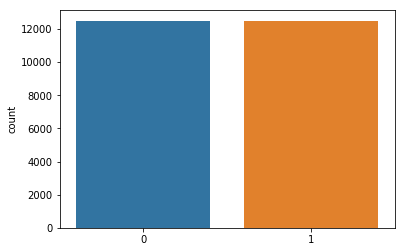

In [5]:
#对比标签
sns.countplot(y)
sns.plt.title('Cats and Dogs')

In [8]:
#预览图片
def show_cats_and_dogs(X, idx):
    plt.figure(figsize=(10,5), frameon=True)
    img = X[idx, :, :, ::-1]
    img = img/255.
    plt.imshow(img)
    plt.show()

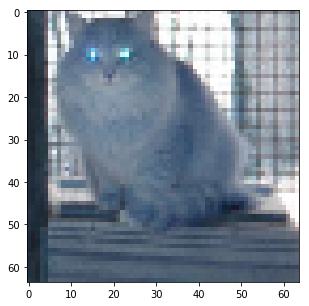

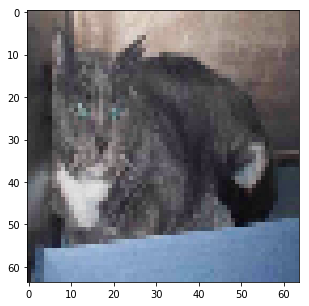

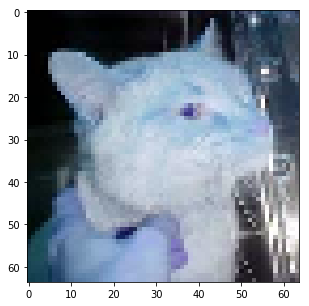

In [9]:
for idx in range(0,3):
    show_cats_and_dogs(X, idx)

## 1.2卷积神经网络

In [10]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.3)

In [11]:
model = Sequential()

model.add(Conv2D(32, 3, input_shape=(WIDTH, HEIGHT, 3), activation='relu', padding="same"))
model.add(Conv2D(32, 3, activation='relu', padding="same"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, activation='relu', padding="same"))
model.add(Conv2D(64, 3, activation='relu', padding="same"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, activation='relu', padding="same"))
model.add(Conv2D(128, 3, activation='relu', padding="same"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, activation='relu', padding="same"))
model.add(Conv2D(256, 3, activation='relu', padding="same"))

model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 喂入数据
history = model.fit(train_X, train_y, validation_data=(test_X,test_y), epochs=20, batch_size=200)
#计算准确率
scores = model.evaluate(test_X, test_y, verbose=0)
print("Large CNN Error:%.2f%%"%(100-scores[1]*100))

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
